# Algorithm Performance Data Analysis - Run 1

Test Parameters 

| | QuadTreeThreshold | AllowedExceedingThreshold | 
| --- | --- | --- | 
| min | 50 | 0 | 
| max | 150 | 0.100 | 
| step| 1 | 0.001 | 
| iteration | 101 | 101 | 

In [1]:
# Import relevant modules 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

# Load the data
data = pd.read_csv('IndividualCompressionData_since_test_20231101_090718.csv')

In [2]:
# Inspect the data
data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231101_090718,10404007.png,502730,410639,92091,0.183182,21,14,61265,42629,18636,0.304187,12.858588,950.511456,18.351230,50,0.000
1,2,test_20231101_090718,1254659.png,342646,288264,54382,0.158712,11,24,80080,35613,44467,0.555282,7.712306,464.101973,21.464669,50,0.000
2,3,test_20231101_090718,10188041.png,221231,52689,168542,0.761837,3,4,41731,7086,34645,0.830198,5.871195,266.019472,23.881669,50,0.000
3,4,test_20231101_090718,10287332.png,216980,48712,168268,0.775500,2,4,22337,6465,15872,0.710570,6.048130,250.799749,24.137533,50,0.000
4,5,test_20231101_090718,11610969.png,368720,207954,160766,0.436011,6,5,84111,28480,55631,0.661400,8.981344,544.255072,20.772779,50,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100995,6,test_20231101_111915,10350842.png,212614,24,212590,0.999887,1,14,42529,1,42528,0.999976,55.226706,11938.014080,7.361483,150,0.099
100996,7,test_20231101_111915,10863862.png,317432,24,317408,0.999924,0,4,66058,1,66057,0.999985,55.749476,12668.007861,7.103720,150,0.099
100997,8,test_20231101_111915,11382381.png,312486,24,312462,0.999923,1,4,46745,1,46744,0.999979,30.521228,5261.919984,10.919361,150,0.099
100998,9,test_20231101_111915,11079715.png,443815,2557,441258,0.994239,3,8,124136,369,123767,0.997027,46.332315,11601.316933,7.485731,150,0.099


In [3]:
data.describe()

,SN,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
count,101000.000000,101000.00000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000
mean,5.500000,321053.70000,44281.774911,276771.925089,0.882312,2.237475,4.461861,60908.400000,5921.440554,54986.959446,0.923615,25.810048,4441.030918,13.377494,100.000000,0.049500
std,2.872296,92668.83161,74984.637041,87575.252445,0.179967,1.716455,1.458852,27852.495343,9749.996953,22984.463997,0.108897,15.450440,4368.292757,3.898960,29.154904,0.028866
min,1.000000,212614.00000,24.000000,18293.000000,0.041218,0.000000,3.000000,22337.000000,1.000000,15872.000000,0.304187,5.871195,250.799749,4.132739,50.000000,0.000000
25%,3.000000,221231.00000,24.000000,212590.000000,0.840988,1.000000,4.000000,41731.000000,1.000000,40091.000000,0.888683,14.623943,1507.005728,10.919361,75.000000,0.024750
50%,5.500000,314959.00000,8434.000000,271859.000000,0.967968,2.000000,4.000000,54005.000000,1203.000000,46744.000000,0.972455,21.219282,3091.946080,13.228484,100.000000,0.049500
75%,8.000000,368720.00000,51767.000000,314585.000000,0.999892,3.000000,5.000000,80080.000000,7249.250000,66057.000000,0.999975,31.611186,5261.919984,16.349655,125.000000,0.074250
max,10.000000,502730.00000,425522.000000,502706.000000,0.999952,46.000000,86.000000,124136.000000,56246.000000,123767.000000,0.999988,86.396510,25107.671600,24.137533,150.000000,0.099000


## Analyze per Image

In [4]:
# Select an image
image_name = data['FileName'].iloc[0]  # Gets the first image name; replace with a specific name if needed
# Get all the test result for this image
singe_image_data = data[data['FileName'] == image_name] 

In [5]:
singe_image_data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231101_090718,10404007.png,502730,410639,92091,0.183182,21,14,61265,42629,18636,0.304187,12.858588,950.511456,18.351230,50,0.000
10,1,test_20231101_090719,10404007.png,502730,410639,92091,0.183182,15,6,61265,42629,18636,0.304187,12.858588,950.511456,18.351230,50,0.001
20,1,test_20231101_090720,10404007.png,502730,410639,92091,0.183182,6,6,61265,42629,18636,0.304187,12.858588,950.511456,18.351230,50,0.002
30,1,test_20231101_090721,10404007.png,502730,410497,92233,0.183464,8,6,61265,42624,18641,0.304268,12.861714,950.928565,18.349325,50,0.003
40,1,test_20231101_090722,10404007.png,502730,410017,92713,0.184419,7,6,61265,42591,18674,0.304807,12.889060,954.131435,18.334722,50,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100950,1,test_20231101_111912,10404007.png,502730,24,502706,0.999952,1,4,61265,1,61264,0.999984,31.611186,5234.651008,10.941926,150,0.095
100960,1,test_20231101_111913,10404007.png,502730,24,502706,0.999952,1,4,61265,1,61264,0.999984,31.611186,5234.651008,10.941926,150,0.096
100970,1,test_20231101_111913,10404007.png,502730,24,502706,0.999952,1,4,61265,1,61264,0.999984,31.611186,5234.651008,10.941926,150,0.097
100980,1,test_20231101_111914,10404007.png,502730,24,502706,0.999952,1,5,61265,1,61264,0.999984,31.611186,5234.651008,10.941926,150,0.098


In [ ]:
# # List of metrics interested in
# metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

# # Create a separate plot for each metric
# for metric in metrics:
#     plt.figure(figsize=(10, 6))
    
#     # Group by AllowedExceedingThresholdFactor and plot
#     for key, sub_group in singe_image_data.groupby('AllowedExceedingThresholdFactor'):
#         plt.plot(sub_group['QuadtreeThreshold'], sub_group[metric], label=f'Factor={key}')
    
#     plt.title(f'{image_name} - {metric}')
#     plt.xlabel('QuadtreeThreshold')
#     plt.ylabel(metric)
#     plt.legend()
#     plt.grid(True)
#     plt.show()


## Analyze per Test

In [3]:
# Group the data based on 'TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor', calculate the mean for each of them 
data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()

/var/folders/y7/s3dq5fdd6pzgms8yt_kxxqw00000gn/T/ipykernel_50806/1924922927.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()


In [4]:
data_grouped_by_test

,TestID,QuadtreeThreshold,AllowedExceedingThresholdFactor,SN,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR
0,test_20231101_090718,50,0.000,5.5,321053.7,170959.8,150093.9,0.537027,6.3,7.3,60908.4,21386.0,39522.4,0.690332,8.255644,463.003486,21.802452
1,test_20231101_090719,50,0.001,5.5,321053.7,170842.8,150210.9,0.537476,5.9,4.9,60908.4,21372.1,39536.3,0.690662,8.295974,466.064294,21.764106
2,test_20231101_090720,50,0.002,5.5,321053.7,170746.1,150307.6,0.537826,3.8,4.5,60908.4,21360.2,39548.2,0.690926,8.339274,469.373698,21.729785
3,test_20231101_090721,50,0.003,5.5,321053.7,170660.7,150393.0,0.538108,4.4,4.6,60908.4,21351.6,39556.8,0.691113,8.463874,480.911681,21.568865
4,test_20231101_090722,50,0.004,5.5,321053.7,169994.7,151059.0,0.540214,4.2,4.9,60908.4,21273.9,39634.5,0.692525,8.552145,488.899803,21.485500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10095,test_20231101_111912,150,0.095,5.5,321053.7,757.6,320296.1,0.997955,1.0,5.0,60908.4,107.8,60800.6,0.998817,46.805606,10688.998313,8.508295
10096,test_20231101_111913,150,0.096,5.5,321053.7,757.6,320296.1,0.997955,1.0,4.3,60908.4,107.8,60800.6,0.998817,46.805606,10688.998313,8.508295
10097,test_20231101_111913,150,0.097,5.5,321053.7,757.6,320296.1,0.997955,1.2,4.6,60908.4,107.8,60800.6,0.998817,46.805606,10688.998313,8.508295
10098,test_20231101_111914,150,0.098,5.5,321053.7,721.6,320332.1,0.998052,1.1,4.5,60908.4,102.4,60806.0,0.998877,46.821962,10694.998049,8.506274


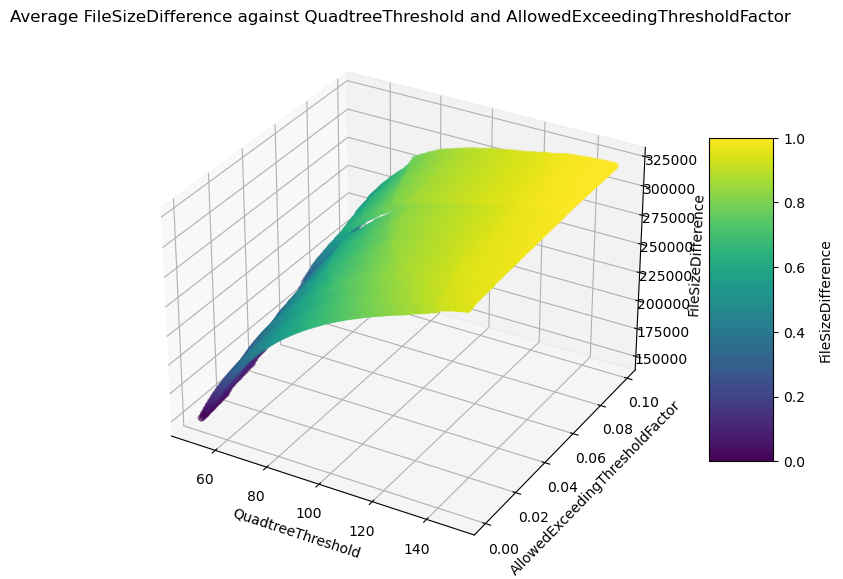

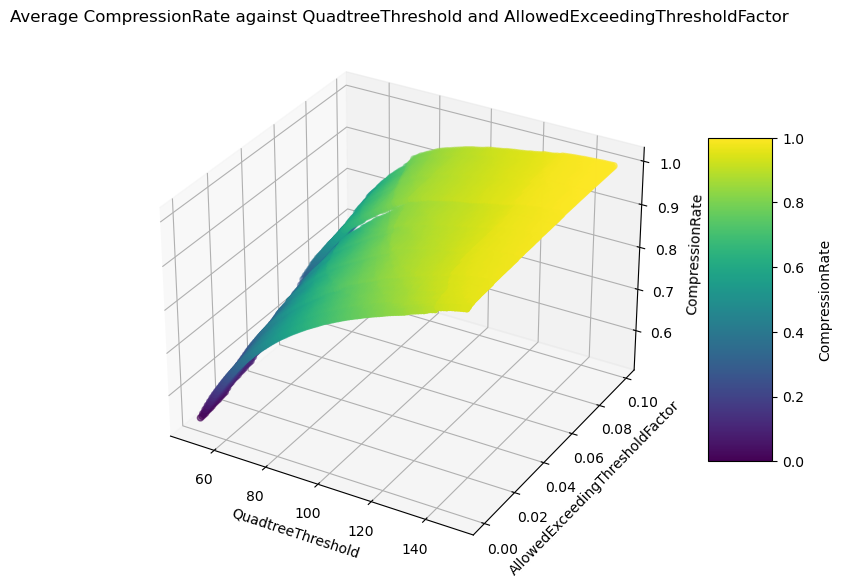

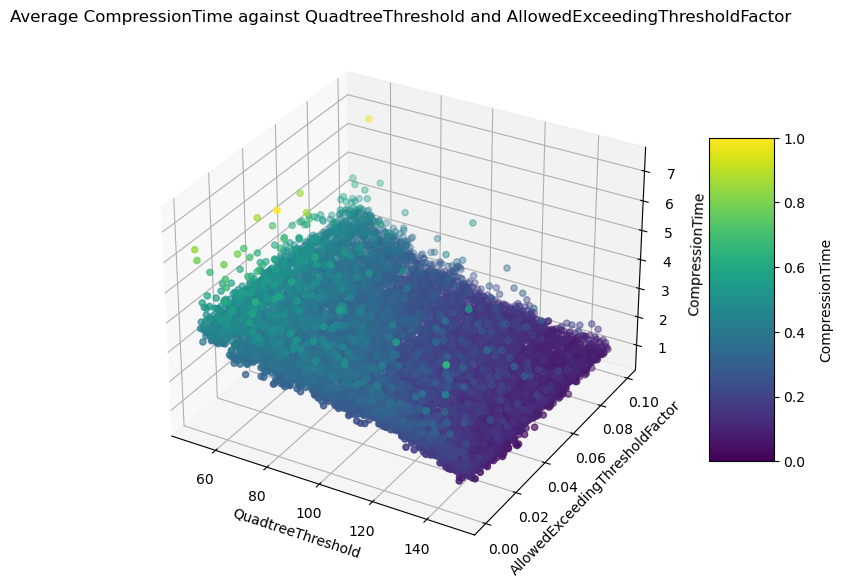

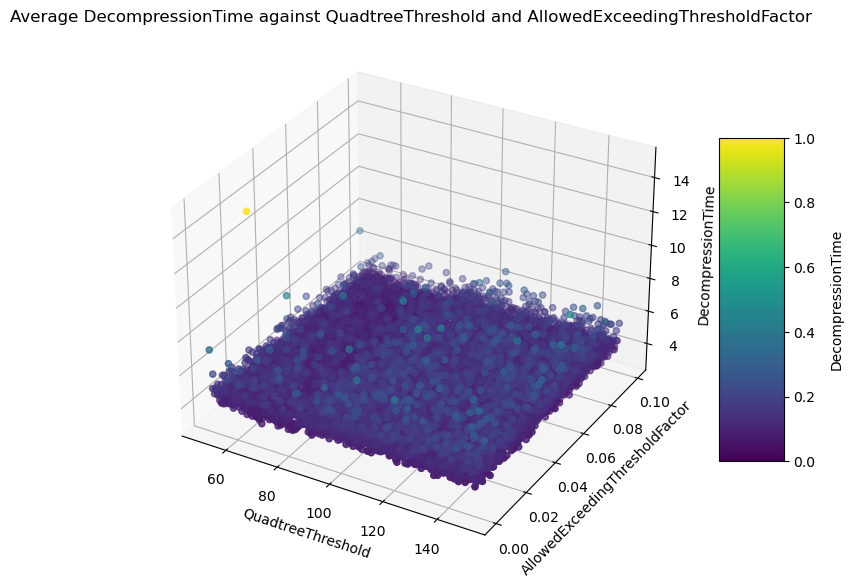

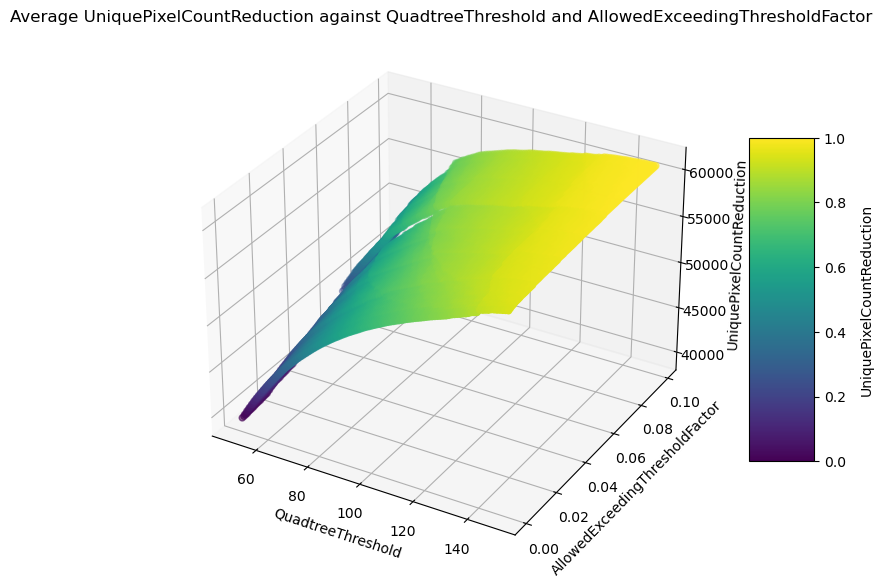

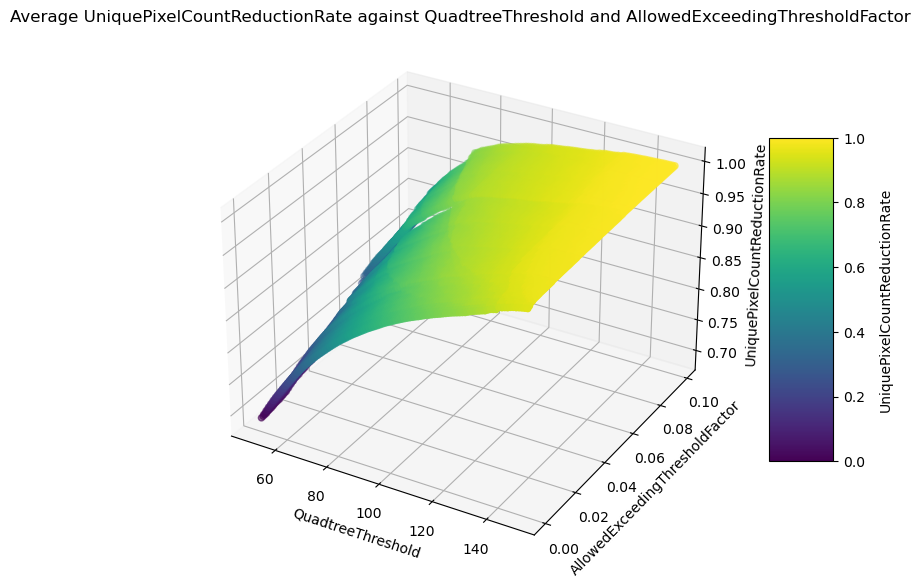

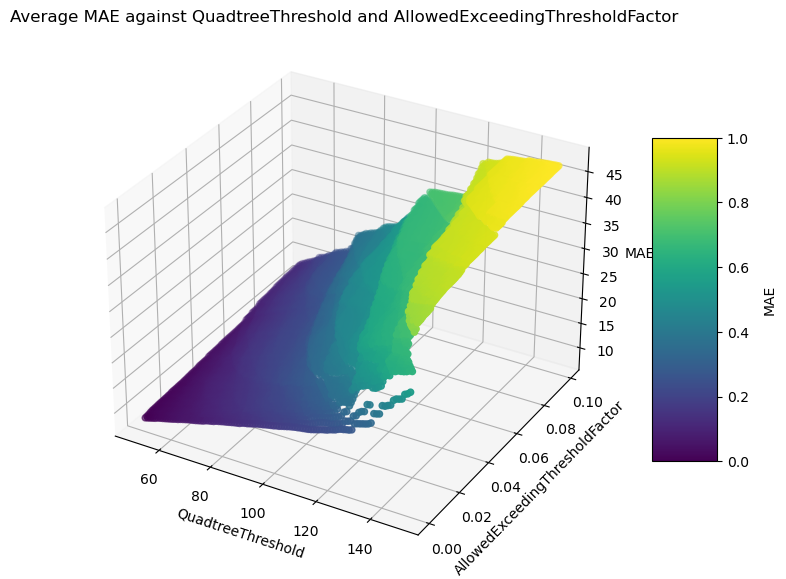

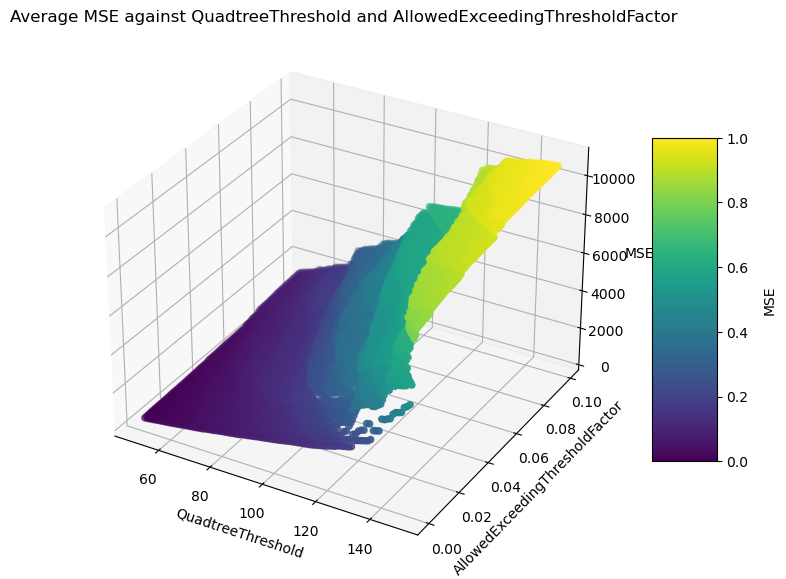

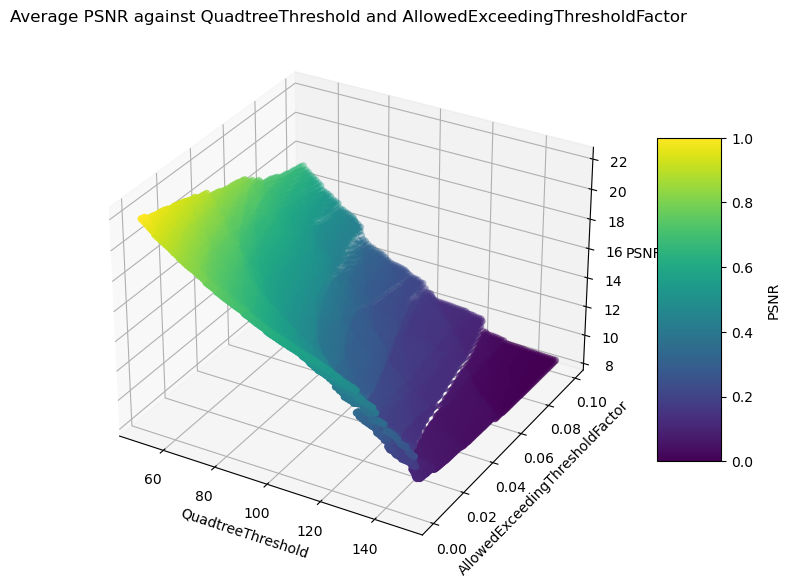

In [9]:
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

for metric in metrics:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Data for plotting
    x = data_grouped_by_test['QuadtreeThreshold']
    y = data_grouped_by_test['AllowedExceedingThresholdFactor']
    z = data_grouped_by_test[metric]
    
    # Using a colormap to represent Z values with colors
    norm = plt.Normalize(z.min(), z.max())
    colors = plt.cm.viridis(norm(z))
    sc = ax.scatter(x, y, z, c=colors)
    
    ax.set_xlabel('QuadtreeThreshold')
    ax.set_ylabel('AllowedExceedingThresholdFactor')
    ax.set_zlabel(metric)
    ax.set_title(f'Average {metric} against QuadtreeThreshold and AllowedExceedingThresholdFactor')
    
    # Adding a colorbar to the graph to indicate the scale
    cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
    cbar.set_label(metric, labelpad=10)
    
    plt.show()


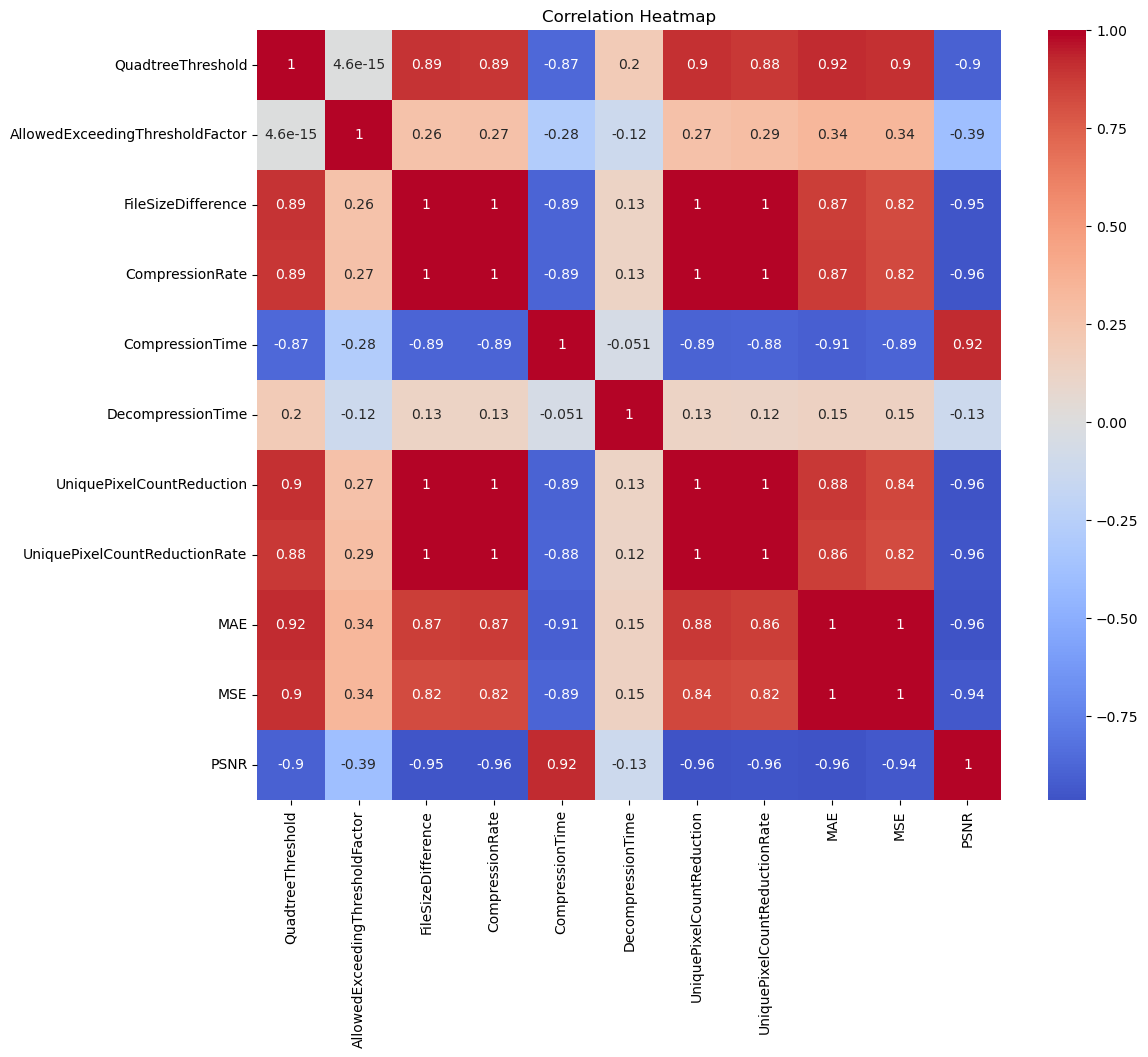

In [10]:
# Calculate the correlation matrix
correlation = data_grouped_by_test[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Score and Evaluation

In [5]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize metrics
# data_grouped_by_test['CompressionRate'] = normalize(data_grouped_by_test['CompressionRate'])
data_grouped_by_test['CompressionTime'] = normalize(data_grouped_by_test['CompressionTime'])
data_grouped_by_test['DecompressionTime'] = normalize(data_grouped_by_test['DecompressionTime'])
data_grouped_by_test['MAE'] = normalize(data_grouped_by_test['MAE'])
data_grouped_by_test['MSE'] = normalize(data_grouped_by_test['MSE'])
data_grouped_by_test['PSNR'] = normalize(data_grouped_by_test['PSNR'])

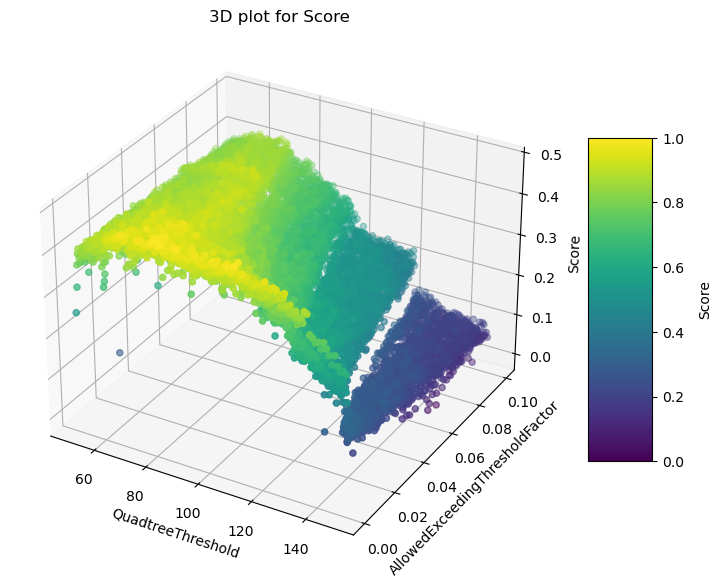

In [6]:
# Calculate LossScore
data_grouped_by_test['LossScore'] = -data_grouped_by_test['MAE'] - data_grouped_by_test['MSE'] + data_grouped_by_test['PSNR']

# Calculate the total score
data_grouped_by_test['Score'] = (5/9 * data_grouped_by_test['CompressionRate'] 
                         - 2/9 * (data_grouped_by_test['CompressionTime'] + data_grouped_by_test['DecompressionTime'])
                         + 2/9 * data_grouped_by_test['LossScore'])

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Data for plotting
x = data_grouped_by_test['QuadtreeThreshold']
y = data_grouped_by_test['AllowedExceedingThresholdFactor']
z = data_grouped_by_test['Score']

# Using a colormap to represent Z values (scores) with colors
norm = plt.Normalize(z.min(), z.max())
colors = plt.cm.viridis(norm(z))
sc = ax.scatter(x, y, z, c=colors)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
ax.set_title('3D plot for Score')

# Adding a colorbar to the graph
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
cbar.set_label('Score', labelpad=10)

plt.show()

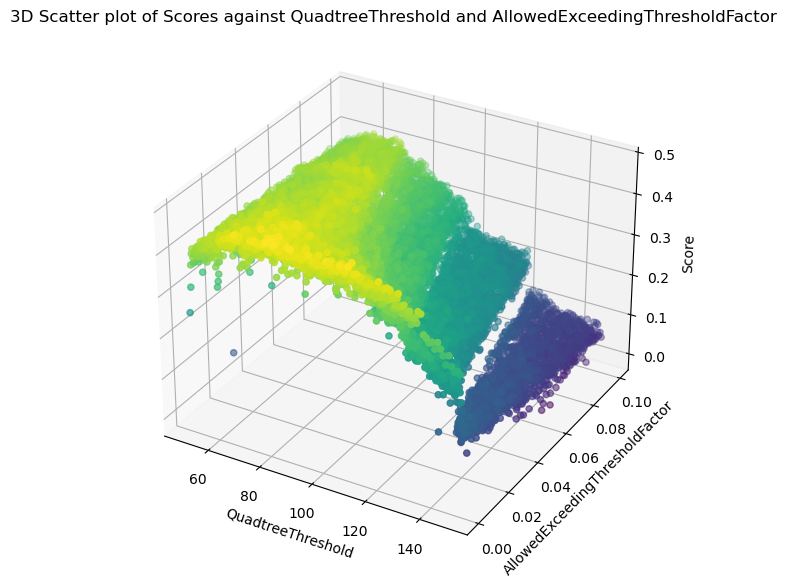

In [7]:
data_grouped_by_test = data_grouped_by_test.sort_values(by='Score', ascending=False)
top_3 = data_grouped_by_test.head(3)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for all data points
ax.scatter(data_grouped_by_test['QuadtreeThreshold'], data_grouped_by_test['AllowedExceedingThresholdFactor'], data_grouped_by_test['Score'], c=data_grouped_by_test['Score'], cmap='viridis')

# Highlighting and annotating top 3 scores
for index, row in top_3.iterrows():
    ax.scatter(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], c='red', s=100)  # use larger size and red color
    label = '({}, {}, {:.2f})'.format(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'])
    ax.text(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], label, fontsize=9)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
plt.title('3D Scatter plot of Scores against QuadtreeThreshold and AllowedExceedingThresholdFactor')
plt.show()

In [8]:
# Print out the top 3
print(top_3[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'Score']])


      QuadtreeThreshold  AllowedExceedingThresholdFactor     Score
3101                 81                            0.001  0.476345
3900                 89                            0.000  0.474028
3300                 83                            0.000  0.474001
